##Limpieza de Datos del dataset: Student Exam Scores

Este conjunto de datos incluye puntuaciones de tres exámenes de estudiantes de una escuela pública (ficticia) y una variedad de factores personales y socioeconómicos que pueden tener efectos de interacción sobre ellos.

En este notebook, lo que se hara **UNICAMENTE ES LA LIMPIEZA DE DATOS Y MANEJO DE VALORES NULOS**. Si deseas conocer o profundizar mas en este dataset puedes ingresar al link donde lo obtuve: [Student Exam Scores](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores/data?select=Expanded_data_with_more_features.csv)

In [1]:
#Upgradeamos el sistema
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
#Instalamos las librerias que consideramos utiles
!pip install pyjanitor matplotlib missingno pandas scipy seaborn session-info scikit-learn statsmodels==0.13.2 upsetplot

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 25.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=2c83714cd988ffda246c5a23ed8153e5ebc78f212967c911d6834830a1e9ff73
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24814 sha256=e92d3f4495e003fa089fa640105e93479d271c2d2205217cdbcaaa53d74e39dd
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built session-info upsetplot
  Attemptin

##Importamos las librerias

In [3]:
import janitor #Permite limpiar los datos de una forma sencilla
import matplotlib.pyplot as plt #Visualizar los datos
import missingno #Explorar los valores faltantes
import numpy as np #Calculos numericos
import pandas as pd #Lo que nos permitira trabajar con lo df
import scipy.stats #Para realizar unos estadisticos
import seaborn as sns #Para visualizacion estadistica
import session_info #Esto solo es para ver que paquetes tenemos

#skelearn contiene todos los modelos a usar y submodulos para imputacion mas sencilla de valores faltantes
import sklearn
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm #statsmodels nos ayudara a crear unos modelos
import statsmodels.datasets #acceder a conjuntos de datos de prueba
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

##Importamos warning para evitar incomodidades

In [4]:
#Para ignorar un warning que nos puede incomodar
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Importamos Google Colab y damos permisos

Si queremos hacer uso de los datasets de Kaggle mediante la API de estos con Google Colab podemos revisar la información de este sitio web donde paso a paso nos comenta como realizarlo:

[Kaggle and Colab](https://datos.ninja/tutorial/como-utilizar-datasets-de-kaggle-en-google-colab/)

In [5]:
#Dar permisos para acceso a archivos en drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Indicamos la ruta donde se encuentra cargado el API Token de Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Manejo de Valores Faltantes"

#Aca volvemos al directorio donde se trabaja, al ser mismo donde subi el archivo simplemente lo ignoramos
#%cd /content/drive/MyDrive/Colab Notebooks/Manejo de Valores Faltantes

In [7]:
#Copiamos la API del dataset que usaremos y lo descargamos
!kaggle datasets download -d desalegngeb/students-exam-scores

  0% 0.00/695k [00:00<?, ?B/s]
100% 695k/695k [00:00<00:00, 34.5MB/s]


In [8]:
#Descomprimos el archivo
!unzip students-exam-scores.zip

Archive:  students-exam-scores.zip
  inflating: Expanded_data_with_more_features.csv  
  inflating: Original_data_with_more_rows.csv  


In [9]:
#Verificamos la información que tenemos
!ls -la

total 5344
drwxr-xr-x 1 root root    4096 Jan 10 19:24 .
drwxr-xr-x 1 root root    4096 Jan 10 19:21 ..
drwxr-xr-x 4 root root    4096 Jan  9 14:22 .config
drwx------ 5 root root    4096 Jan 10 19:24 drive
-rw-r--r-- 1 root root 2909278 Apr 14  2023 Expanded_data_with_more_features.csv
-rw-r--r-- 1 root root 1825990 Apr 14  2023 Original_data_with_more_rows.csv
drwxr-xr-x 1 root root    4096 Jan  9 14:23 sample_data
-rw-r--r-- 1 root root  711436 Apr 14  2023 students-exam-scores.zip


##Importar funciones personalizadas

In [10]:
#Al usar %run cargamos la funcion y damos acceso a estos metodos de ella
%run "/content/drive/MyDrive/Colab Notebooks/Manejo de Valores Faltantes/Imputación/pandas_missing_extension.ipynb"

  Preparing metadata (setup.py) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.6.1-py3-none-any.whl size=19063 sha256=9b7183aafe805fc4e3163ce615012bc3530b586ddef4d641dda569d3b8c19e8c
  Stored in directory: /root/.cache/pip/wheels/c6/a5/5c/49d553c478da59a455e100b9d5d690833622b9dab375cd2460
Successfully built upsetplot
  Attempting uninstall: upsetplot
    Found existing installation: UpSetPlot 0.9.0
    Uninstalling UpSetPlot-0.9.0:
      Successfully uninstalled UpSetPlot-0.9.0


<ipython-input-10-4fc81e616085>:2: UserWarning: registration of accessor <class '__main__.MissingMethods'> under name 'missing' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class MissingMethods:


Esta seccion del notebook es una parte fundamental de su desarollo, ya que en esta cargamos un notebook que contiene una clase con diversas funciones que nos ayudaran en el tratamiento de datos faltantes

##Cargamos los datos de Student Exam Scores

La composición de los datos es la siguiente (Compuesta por 14 columnas):


*   Gender: Género del estudiante (male/female)

*   EthnicGroup: Grupo étnico del estudiante (group A to E)

*   ParentEduc: Antecedentes educativos de los padres (from some_highscool to master's degree)

*   LunchType: Tipo de almuerzo escolar (standard or free/reduced)

*   TestPrep: curso de preparación para el examen seguido (completed o none)

*   ParentMaritalStatus: estado civil de los padres (married/single/widowed/divorced)

*   PracticeSport: Con qué frecuencia el estudiante practica deporte (never/sometimes/regularly)

*   IsFirstChild: Si el niño es el primer hijo de la familia o no (yes/no)

*   NrSiblings: Número de hermanos que tiene el estudiante (0 a 7)

*   TransportMeans: Medio de transporte al colegio (schoolbus/private)

*   WklyStudyHours: Horas de autoestudio semanales (less that 5hrs; between 5 and 10hrs; more than 10hrs)

*   MathScore: puntuación de la prueba de matemáticas (0-100)

*   ReadingScore: puntuación de la prueba de lectura (0-100)

*   WritingScore: puntuación de la prueba de escritura (0-100)

In [11]:
#Leemos el dataset que vamos a usar que es expanded_data_with_more_feautures
exam_scores_row_df = pd.read_csv('Expanded_data_with_more_features.csv', sep=',')
exam_scores_row_df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


##Procesar los datos exam_scores_row_df

In [12]:
exam_scores_df = (
    exam_scores_row_df
    .clean_names(case_type='snake') #Modifcamos el CamelCase que tenia por snake
    .drop('unnamed_0',axis=1) #Eliminamos la columna no deseada
    .missing.sort_variables_by_missingness() #Para visualizar rapidamente cuales tienen mas valores faltantes descendentemente

)
#Visualizamos como quedo el df
exam_scores_df

,transport_means,parent_educ,ethnic_group,test_prep,nr_siblings,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,math_score,reading_score,writing_score
0,school_bus,bachelor's degree,NaN,none,3.0,married,< 5,yes,regularly,female,standard,71,71,74
1,NaN,some college,group C,NaN,0.0,married,5 - 10,yes,sometimes,female,standard,69,90,88
2,school_bus,master's degree,group B,none,4.0,single,< 5,yes,sometimes,female,standard,87,93,91
3,NaN,associate's degree,group A,none,1.0,married,5 - 10,no,never,male,free/reduced,45,56,42
4,school_bus,some college,group C,none,0.0,married,5 - 10,yes,sometimes,male,standard,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,school_bus,high school,group D,none,2.0,single,5 - 10,no,sometimes,female,standard,59,61,65
30637,private,high school,group E,none,1.0,single,5 - 10,no,regularly,male,standard,58,53,51
30638,private,high school,NaN,completed,1.0,married,5 - 10,no,sometimes,female,free/reduced,61,70,67
30639,school_bus,associate's degree,group D,completed,3.0,married,5 - 10,no,regularly,female,standard,82,90,93


In [13]:
#Verificamos los tipos de datos que tenemos
exam_scores_df.dtypes

transport_means           object
parent_educ               object
ethnic_group              object
test_prep                 object
nr_siblings              float64
parent_marital_status     object
wkly_study_hours          object
is_first_child            object
practice_sport            object
gender                    object
lunch_type                object
math_score                 int64
reading_score              int64
writing_score              int64
dtype: object

In [14]:
#Revisamos los valores unicos de los datos
exam_scores_df.select_dtypes(object).apply(pd.unique)

transport_means                                 [school_bus, nan, private]
parent_educ              [bachelor's degree, some college, master's deg...
ethnic_group             [nan, group C, group B, group A, group D, grou...
test_prep                                           [none, nan, completed]
parent_marital_status            [married, single, widowed, nan, divorced]
wkly_study_hours                                  [< 5, 5 - 10, > 10, nan]
is_first_child                                              [yes, no, nan]
practice_sport                          [regularly, sometimes, never, nan]
gender                                                      [female, male]
lunch_type                                        [standard, free/reduced]
dtype: object

In [15]:
#Verificamos si tenemos valores duplicados
exam_scores_df.duplicated().sum()

0

In [16]:
#Verficamos los nulos que tiene cada variable
exam_scores_df.isna().sum()

transport_means          3134
parent_educ              1845
ethnic_group             1840
test_prep                1830
nr_siblings              1572
parent_marital_status    1190
wkly_study_hours          955
is_first_child            904
practice_sport            631
gender                      0
lunch_type                  0
math_score                  0
reading_score               0
writing_score               0
dtype: int64

Mediante este comando podemos observar como la variable con mayor cantidad datos faltantes es transport_means

In [17]:
#Obtenemos informacion un poco mas detallada del df
exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transport_means        27507 non-null  object 
 1   parent_educ            28796 non-null  object 
 2   ethnic_group           28801 non-null  object 
 3   test_prep              28811 non-null  object 
 4   nr_siblings            29069 non-null  float64
 5   parent_marital_status  29451 non-null  object 
 6   wkly_study_hours       29686 non-null  object 
 7   is_first_child         29737 non-null  object 
 8   practice_sport         30010 non-null  object 
 9   gender                 30641 non-null  object 
 10  lunch_type             30641 non-null  object 
 11  math_score             30641 non-null  int64  
 12  reading_score          30641 non-null  int64  
 13  writing_score          30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+

##Resumenes basicos de valores faltantes

####¿Cuantos datos tenemos en total?

In [18]:
#Vemos la cantidad de datos que tenem
exam_scores_df.size

428974

####¿Cuantas filas y columnas tenemos?

In [19]:
#Verificamos la cantidad de filas y columnas
exam_scores_df.shape

(30641, 14)

####Número total de valores completos (sin observaciones faltantes)

In [20]:
#Usamos la clase creada missing y su funcion number complete
exam_scores_df.missing.number_complete()

415073

Con esto, podemos observar que tenemos 415073 datos completos, que si los comparamos con los 428974 datos totales del dataframe, podemos observar que son mayoria.

####Número total de valores faltantes

In [21]:
exam_scores_df.missing.number_missing()

13901

Al observar la cantidad de valores faltantes, podemos notar que son pocos comparandolo con los totales.

##Resúmenes tabulares de valores faltantes

####Variables/Columnas

####Resumen por variable

In [22]:
#observamos un resumen tabular de la cantidad de valores faltantes por variable y su % que equivale
exam_scores_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,transport_means,3134,30641,10.228126
1,parent_educ,1845,30641,6.021344
2,ethnic_group,1840,30641,6.005026
3,test_prep,1830,30641,5.972390
4,nr_siblings,1572,30641,5.130381
5,parent_marital_status,1190,30641,3.883685
6,wkly_study_hours,955,30641,3.116739
7,is_first_child,904,30641,2.950295
8,practice_sport,631,30641,2.059332
9,gender,0,30641,0.000000


* Esto lo podemos completar con lo anterior donde vimos los valores faltantes, donde nos damos cuenta en este caso que los datos faltantes de transport_means equivalen nomas a un 10.22%  de la cantidad de datos faltantes de la variable.

* Podemos notar tambien como las 8 variables restantes, el % de valores faltante equivale como maximo al 6% unicamente.

####Tabulación del resumen por variable

In [23]:
#Esta funcion nos da una tabla agrupada con la cantidad de valores faltantes que hay
exam_scores_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,5,35.714286
1,631,1,7.142857
2,904,1,7.142857
3,955,1,7.142857
4,1190,1,7.142857
5,1572,1,7.142857
6,1830,1,7.142857
7,1840,1,7.142857
8,1845,1,7.142857
9,3134,1,7.142857


* Esta tabla es la unión del pasado, donde podemos observar que tenemos 5 variables que contienen 0 valores faltantes, indicandonos que no tienen valores faltantes y esta equivale de las 14 variables que tenemos un 35.71%.

* Podemos observar que el resto de variables son unicas, ya que cada una de ellas se repite solo una vez con su respectiva cantidad de valores faltantes.

* Esto es porque de las 9 variables con datos faltantes que tenemos, cada una de ellas tiene diferente cantidad de valores faltantes, ninguna esta relacionada, es por eso que cada una equivale a un 7.14% respecto a todas las columnas del dataset.


####Filas / Observaciones

In [24]:
#Nos da todas las filas con cantidad de valores faltantes que hay en ellas
exam_scores_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,1,6.25
1,1,2,12.50
2,2,0,0.00
3,3,1,6.25
4,4,0,0.00
...,...,...,...
30636,30636,0,0.00
30637,30637,0,0.00
30638,30638,1,6.25
30639,30639,0,0.00


* Con este podemos observar si cada fila tiene o no valores faltantes.
* Esta cantidad de datos faltantes va intercalado entre 0 a 4 como la maxima, denotando que no hay muchos valores faltantes en una misma fila para ser 14 columnas.

####Tabulación del resumen por caso

In [25]:
#Funcion que nos da una tabla agrupada con n cantidad de filas que hay con n cantidad de valores faltantes iguales
exam_scores_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,19243,62.801475
1,1,9200,30.025130
2,2,1917,6.256323
3,3,257,0.838745
4,4,24,0.078326


* Esta tabla es la unión de la anterior, donde podemos visualizar la cantidad de varibles faltantes por filas.

* Podemos ver que tenemos 19243 filas que no presentan valores faltantes y equivale a un 62.80% de los datos en total, identificando que mas de la mitad del dataset no tiene valores faltantes siendo esto positivo.

* El restante 37% casi de los datos equivalen a los valores faltantes, donde van en formato descendente, es decir, 9200 filas tienen un valor faltante, 1917 filas tienen 2 valores faltantes y asi.

###Intervalos de valores faltantes

In [26]:
#muestra el resumen de datos faltantes, datos completos, % de datos faltantes y % de datos completos por bloques de registros
exam_scores_df.missing.missing_variable_span(variable='transport_means',span_every=1000)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,107,893,10.700000,89.300000
1,1,116,884,11.600000,88.400000
2,2,124,876,12.400000,87.600000
3,3,108,892,10.800000,89.200000
4,4,115,885,11.500000,88.500000
5,5,82,918,8.200000,91.800000
6,6,104,896,10.400000,89.600000
7,7,108,892,10.800000,89.200000
8,8,88,912,8.800000,91.200000
9,9,94,906,9.400000,90.600000


* Visualizamos mediante bloques de 1000 datos la variable con mayor cantidad de datos faltantes en nuestro dataset que es transport_means.

* Esto nos permite identificar si existe alguna parte donde se aculumen valores faltantes, pero en este caso parece que los datos estan distribuidos al azar y que en menor medida son los valores faltantes a los completos, ya que si comparamos el PCT de ambos, el de los faltantes como maximo llega a 12% y el de los valores completos no baja del 87%.

##Visualización inicial de valores faltantes

No es ninguna sorpresa para nadie que los seres humanos somos más visuales y entendemos con mayor claridad o recordamos fácilmente cuando vemos un grafico que es fácil de interpretar, por ello, se mostraran unos gráficos que demuestren como es la distribución de los valores faltantes en este conjunto de datos.

####Vistazo general

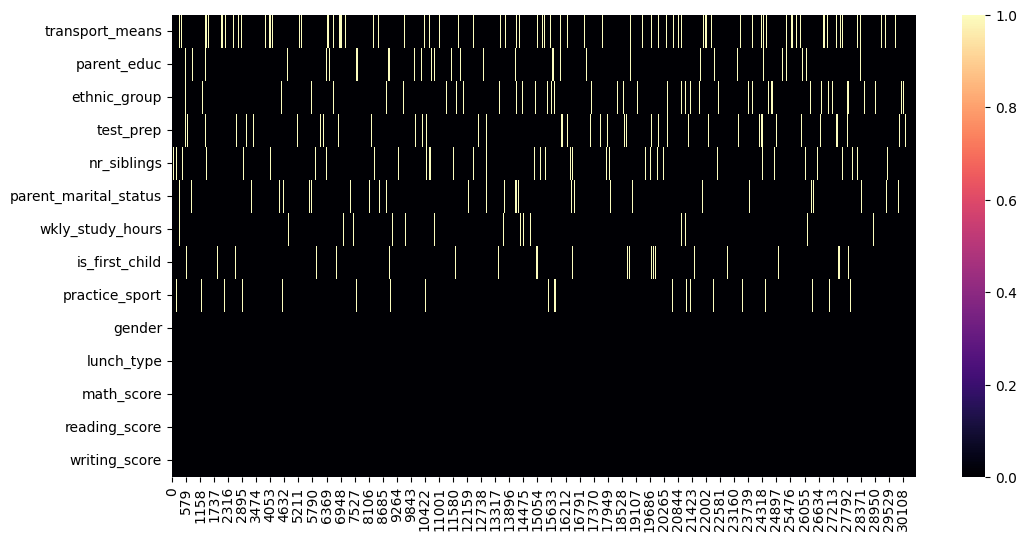

In [27]:
#Podemos ver un mapa de calor de los datos con sus valores faltantes
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(exam_scores_df.isnull().transpose(),cmap='magma',ax=ax);

Al realizar este heatmap podemos ver que cada estudiante tiene valores faltantes bastante aleatorios, no hay muchas partes donde los datos faltantes se junten.

####Variable

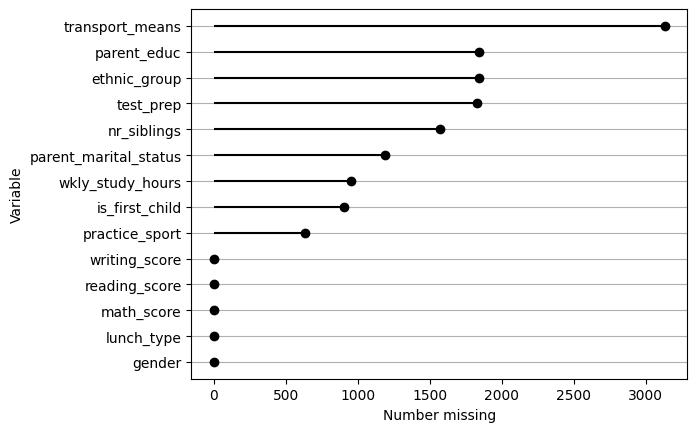

In [28]:
#Visualizamos un lollipop plot para ver la cantidad de valores faltantes por variable
exam_scores_df.missing.missing_variable_plot()

* Este es un complemento visual de una de las tablas realizadas anteriormente, donde facilmente podemos identificar las variables con mayor cantidad de valores faltantes.

*	A simple vista podemos ver que transport_means es la que contiene mayor cantidad de datos faltantes y que tenemos 3 variables con cantidades de valores faltantes similares luego de esta.

####Observaciones/Filas

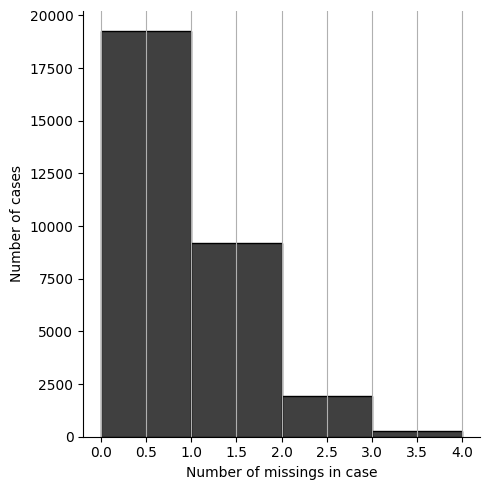

In [29]:
#Ver en un histograma de frecuencia los valores faltantes por cantidad de filas
exam_scores_df.missing.missing_case_plot()

* Podemos observar con este grafico que nuestros valores estan mas sesgados a la izquierda, indicandonos que en su mayoria hay mas valores totales a faltantes.

* Con el resto podemos ver que la cantidad de valores faltantes por filas que son 1,2,3 y 4 estan en menor medida, denotando que las filas que poseen 4 valores faltantes son muy atipicas, pero se deben tratar para evitar inconvenientes.

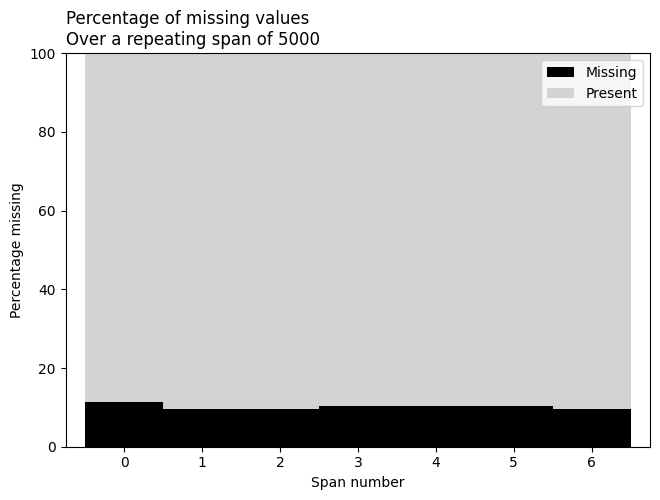

In [30]:
#Graficamos un span, para visuualizar por bloques el % de valores faltantes
exam_scores_df.missing.missing_variable_span_plot(variable='transport_means',span_every=5000,rot=0)

En este caso dividimos la data por bloques de 5000 filas ya que tenemos bastante información, al observar esto podemos notar que en mayor medida como se van distribuyendo los valores faltantes, notando que estan casi a la par los 6 bloques.

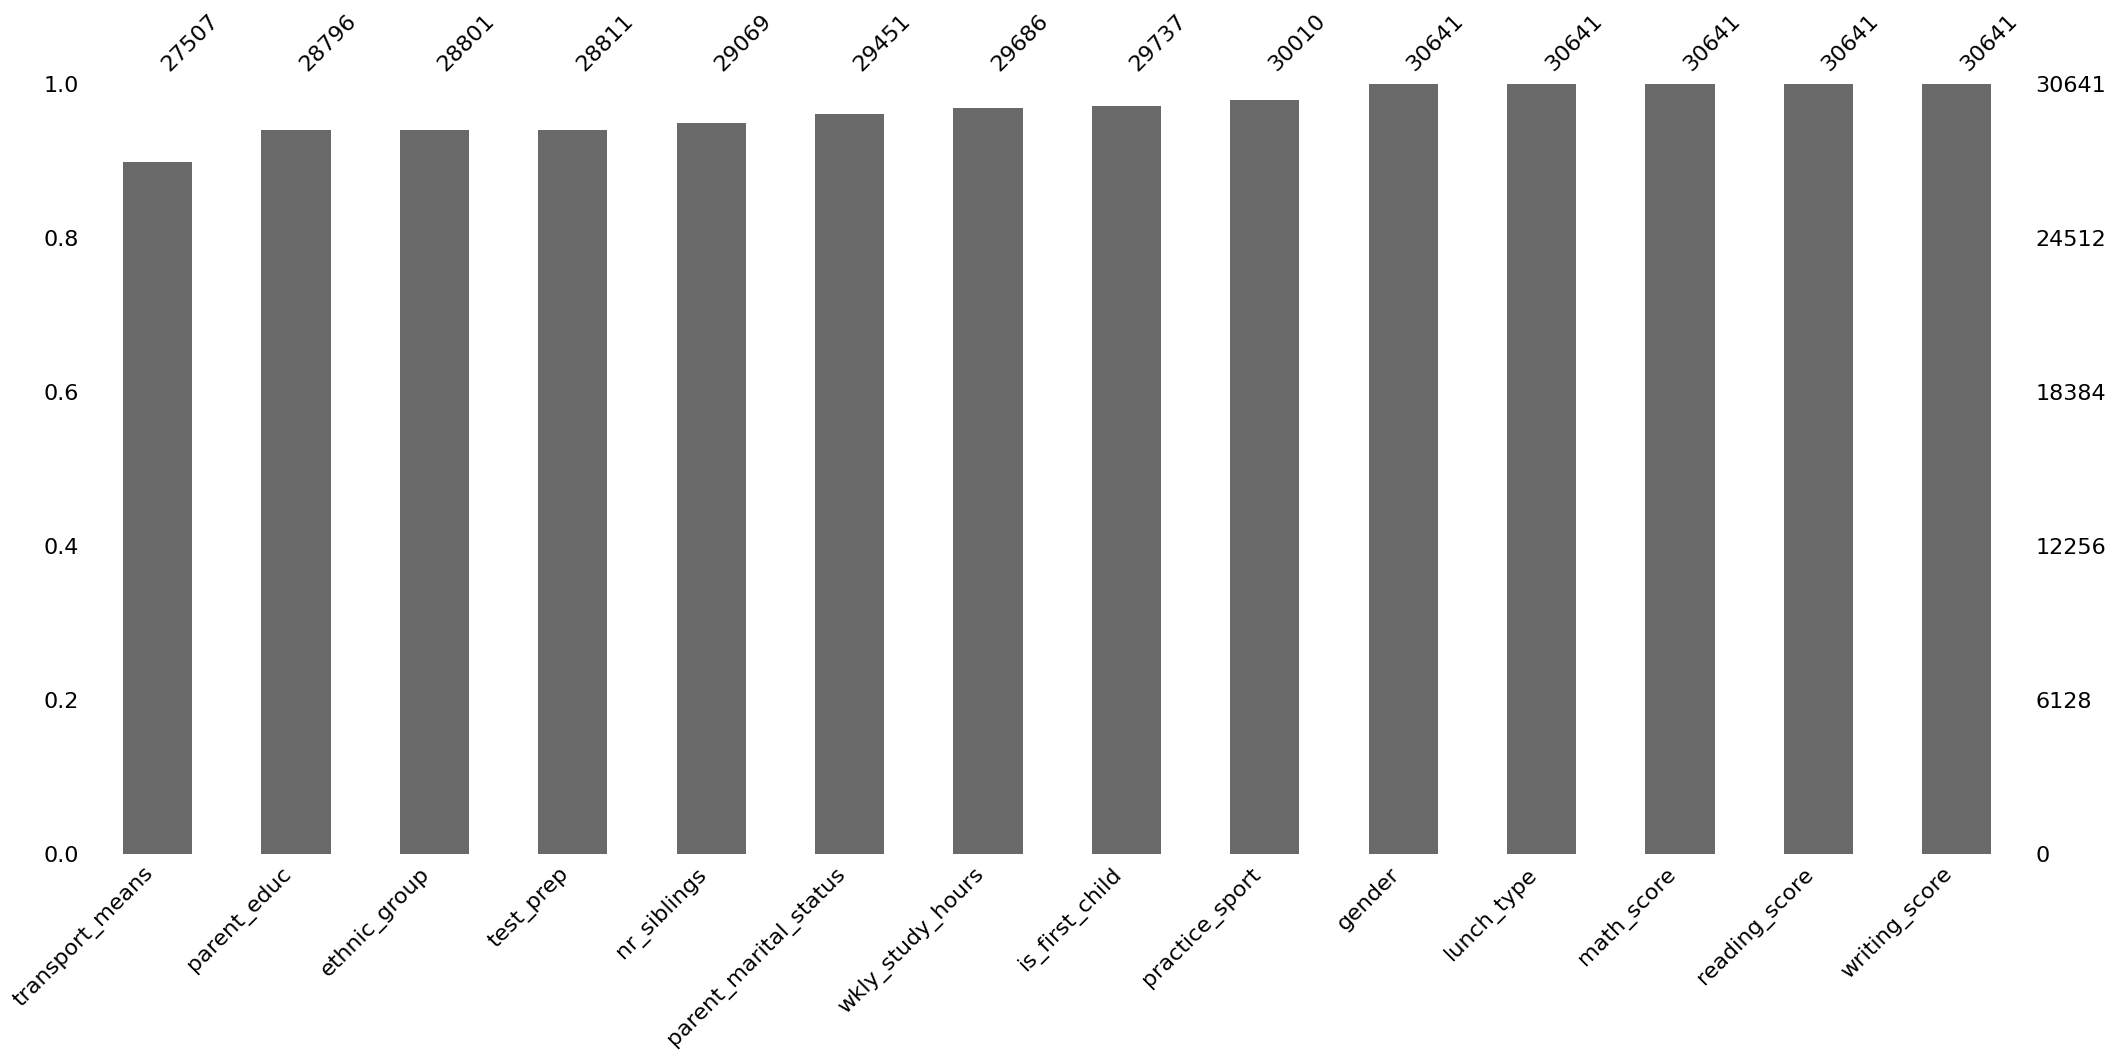

In [31]:
#Usamos missigno para realizar un grafico de barras con la proporcion de valores faltantes
missingno.bar(df=exam_scores_df);

* Mediante este grafico podemos ver las variables con sus datos. Algunas variables que tengan espacios en blanco es porque contienen valores faltantes.

* Podemos ver en la parte superior de la barra la cantidad de datos que tenemos por variable y asi conocer de las 9 columnas con valores faltantes cuantos tenemos en total.

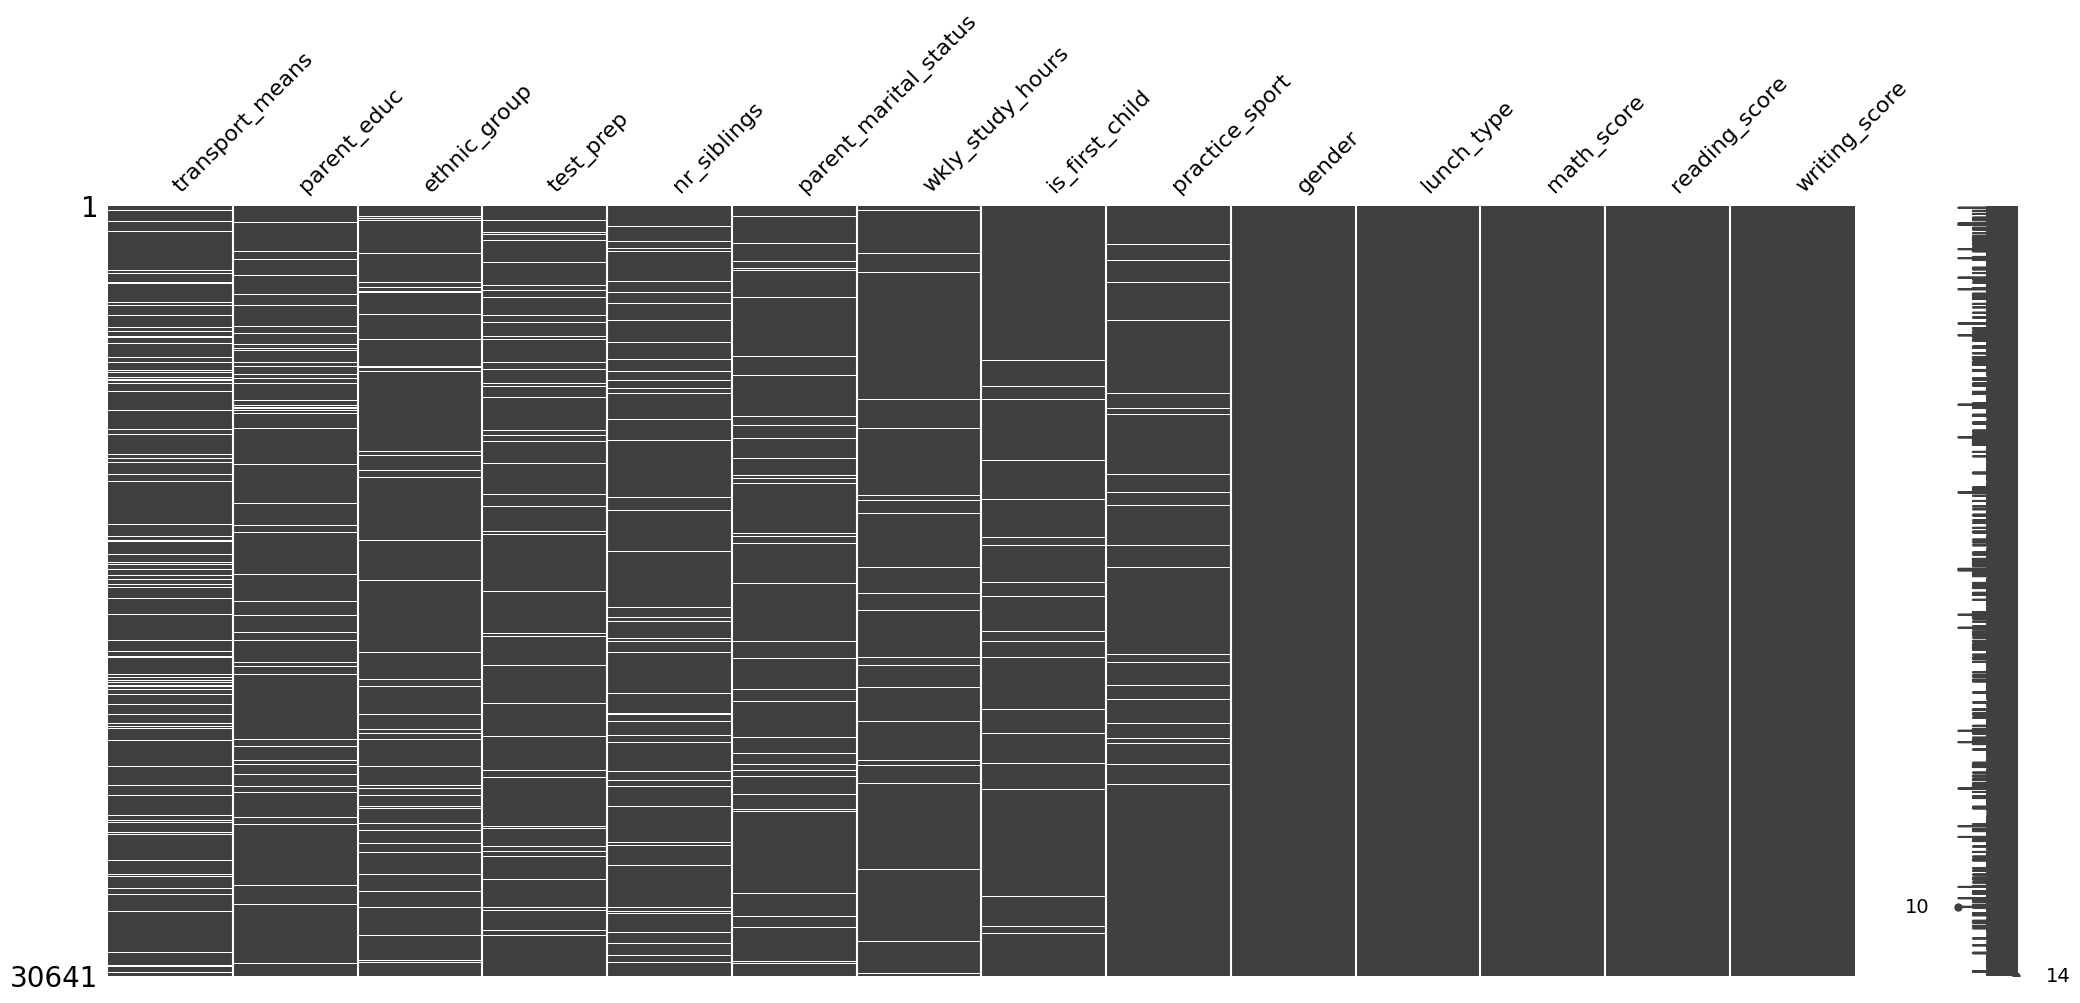

In [32]:
#Usamos matrix de missingno para ver los picos de los valores faltantes y su distribuccion
missingno.matrix(df=exam_scores_df);

* Las barras que se encuentran totalmente negras es que tenemos todos los valores.

* Al haber espacios en blanco nos indican que se presentan valores faltantes.

* A la derecha podemos visualizar los picos o filas donde se puedan acumular los valores faltantes, pero en este caso no vemos algo demasiado exagerado donde se acumulen, parece como si todos tuviesen una distribucción similar.

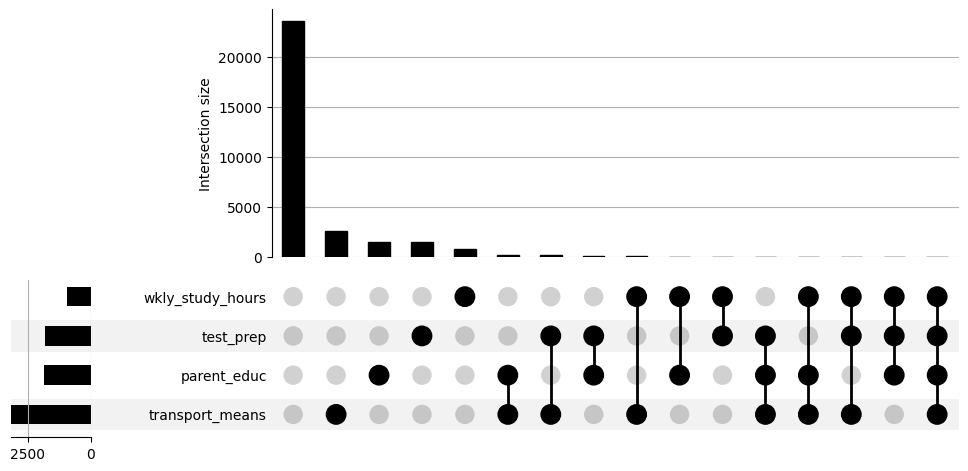

In [33]:
#Usamos upsetplot para comparar como relacionan entre si los faltantes
exam_scores_df.missing.missing_upsetplot(['transport_means','parent_educ','test_prep','wkly_study_hours'], element_size=40);

* Este grafico con 4 variables nos da muy pocas observaciones que estas variables compartan con valores faltantes.

* Las que pueden compartir un poco y eso que no mucho es parent_educ y transport_means, incluso su relación se ve muy minima.

*	Podemos ver que cuando las variables no se comparten, es decir, estan por su lado cada una, es donde mas valores faltantes presentan, pareciera como si estas no se relacionaran.

##Distinto tipos de valores faltantes

Debemos tener en cuenta que existe 3 tipos de valores faltantes e identificar cual es de vital importancia para saber que hacer:

* **Missing Completly At Random (MCAR)**: La localización de los valores faltantes en el conjunto de datos ocurren completamente al azar, estos no dependen de ningún otro dato.

* **Missing At Random (MAR)**:La localización de los valores faltantes en el conjunto de datos dependen de otros valores observados.


* **Missing Not At Random (MNAR)**:La localización de los valores faltantes en el conjunto de datos dependen de otros valores faltantes en sí mismos.


Es decir, en resumen podemos decir:

* **MCAR**: Se puede Eliminar o Imputar valores, pero es recomendable imputar valores.

* **MAR**: Se puede realizar una imputacion unica o imputacion multiple, es decir que se considere una columna al imputar o que se tengan en cuenta los valores de otras columnas para imputar un valor faltante.

* **MNAR**: Mejorar los experimentos o realizar analisis de sensibilidad.



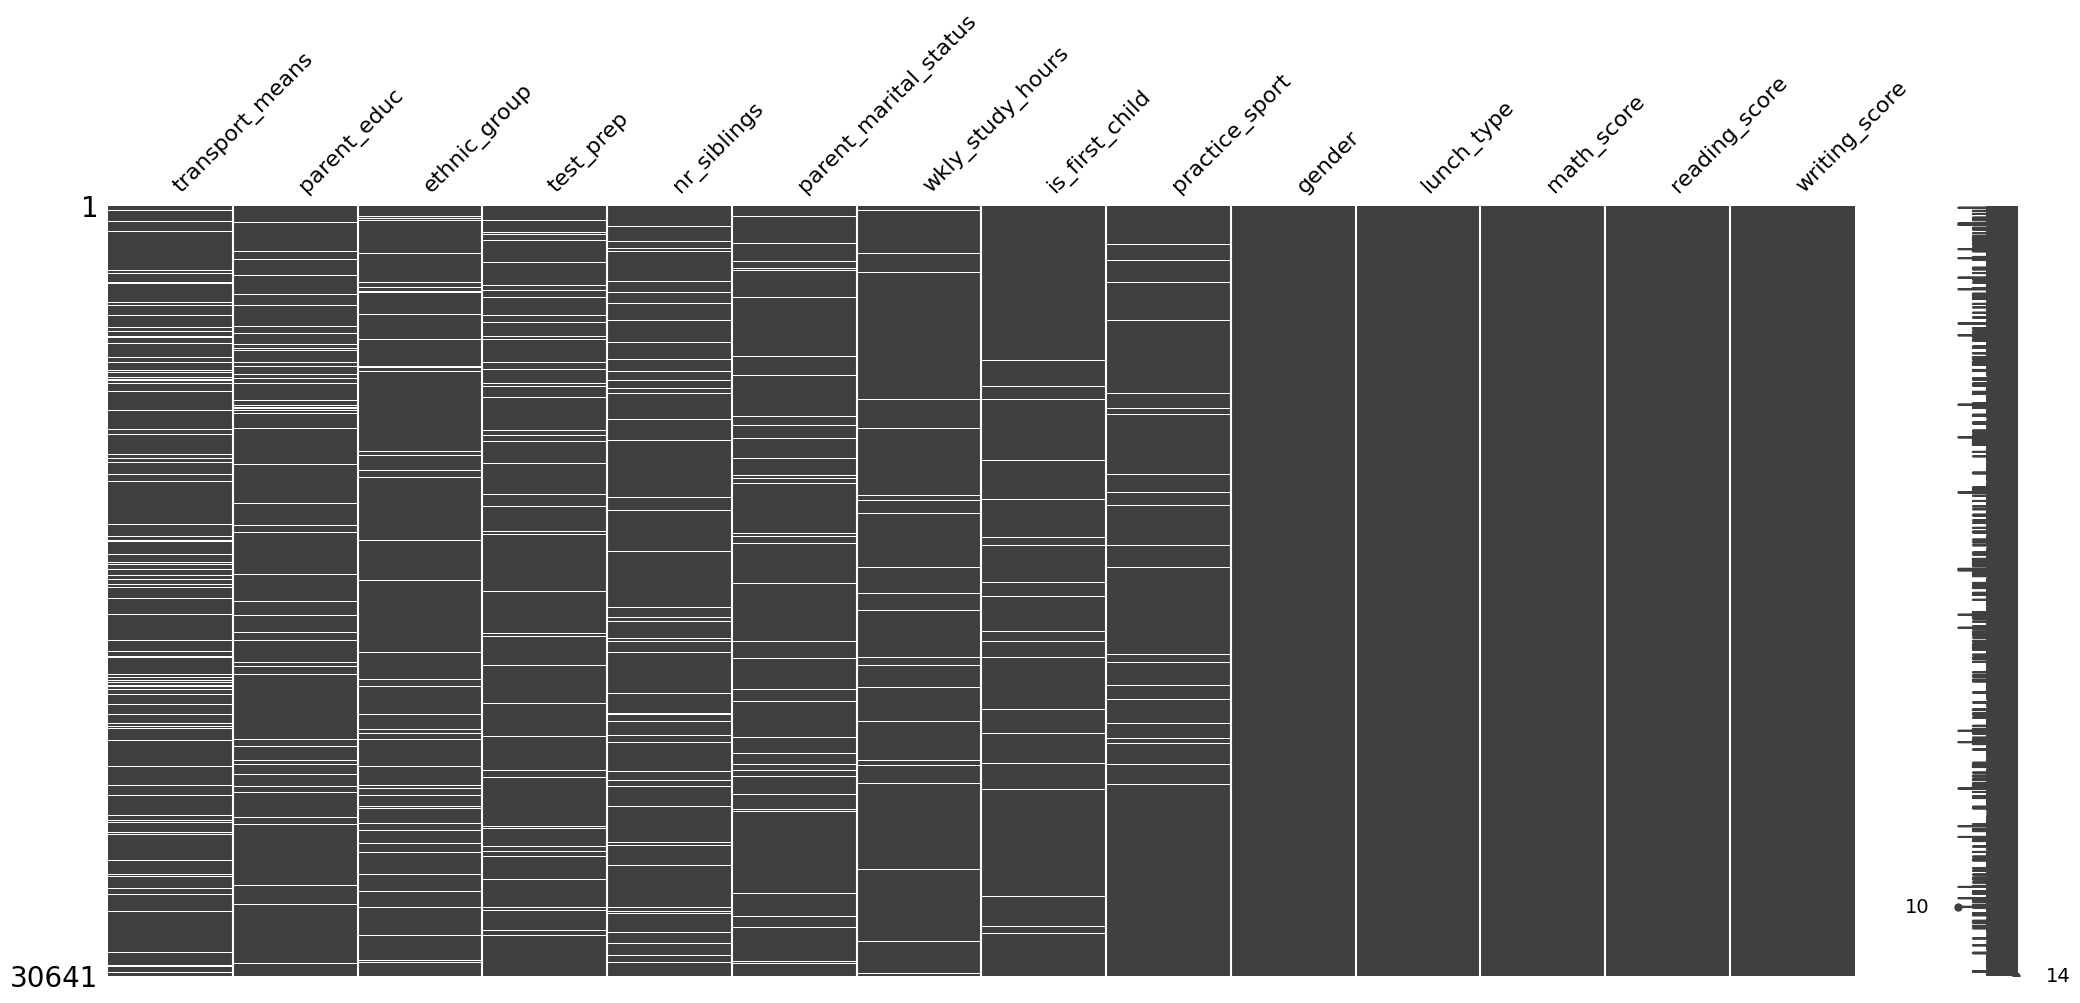

In [34]:
#Por eso, comparamos como estan nuestro valores faltantes reutilizando la matrix de missingno
missingno.matrix(df=exam_scores_df);

* Visualizando el grafico, podemos notar que las columnas con valores faltantes tienen varios datos ausentes, pero si lo comparamos con la información pasada sabemos que no son muchos.

* Es probable que los datos faltantes esten perdidos de manera aleatoria, ya que no son muchos datos si se compara con el total existente, ademas parece que no presentan algun orden o relación frente a la frecuencia de valores faltantes, por eso se pueden considerar al azar, siendo tipo de dato faltante MCAR




##Tratamiento de variables categoricas para imputación

* Hay que tener en cuenta que el manejo de valores categoricos para realizar operaciones no es idoneo, es por esto que se requiere codificar estas cadenas de textos a numeros para que los algoritmos los entiendan mejor y la realización de operaciones sea mas sencilla.

* En nuestro dataset 10 de las 14 variables son categoricas, por eso se debe hacer una codificacion.


In [35]:
#Primero, para evitar errores y no dañar la estructura de nuestro df haremos una copia de este
exam_scores_df_codificaded = exam_scores_df.copy(deep=True)
exam_scores_df_codificaded

,transport_means,parent_educ,ethnic_group,test_prep,nr_siblings,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,math_score,reading_score,writing_score
0,school_bus,bachelor's degree,NaN,none,3.0,married,< 5,yes,regularly,female,standard,71,71,74
1,NaN,some college,group C,NaN,0.0,married,5 - 10,yes,sometimes,female,standard,69,90,88
2,school_bus,master's degree,group B,none,4.0,single,< 5,yes,sometimes,female,standard,87,93,91
3,NaN,associate's degree,group A,none,1.0,married,5 - 10,no,never,male,free/reduced,45,56,42
4,school_bus,some college,group C,none,0.0,married,5 - 10,yes,sometimes,male,standard,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,school_bus,high school,group D,none,2.0,single,5 - 10,no,sometimes,female,standard,59,61,65
30637,private,high school,group E,none,1.0,single,5 - 10,no,regularly,male,standard,58,53,51
30638,private,high school,NaN,completed,1.0,married,5 - 10,no,sometimes,female,free/reduced,61,70,67
30639,school_bus,associate's degree,group D,completed,3.0,married,5 - 10,no,regularly,female,standard,82,90,93


##Decidiendo que tipo de codificación usar




Existen 2 codificaciones: Ordinal y One Hot Encoding:


* **Codificación Ordinal**: Consiste en mapear cada elemento unico de texto a un numero entero.

* **One Hot Encoding**: Consiste en crear una matriz de 1 y 0. El 1 representa la presencia de una caracteristica o categoria de la variable de interes y 0 la ausencia de la misma. La lista se convierte en un formato ancho de manera que cada columna representa un elemento unico de nuesta categoria.

In [36]:
#Necesitamos verificar que tantos elementos tienen las variables categoricas y asi decidir

# Obtener todas las columnas que son de tipo 'object'
object_columns = exam_scores_df.select_dtypes(object).columns

# Iterar sobre estas columnas y mostrar sus valores únicos
for column in object_columns:
    unique_values = exam_scores_df_codificaded[column].unique()
    print(f"Valores únicos de la columna {column}: {unique_values}")
    print('*' * 100)


Valores únicos de la columna transport_means: ['school_bus' nan 'private']
****************************************************************************************************
Valores únicos de la columna parent_educ: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
****************************************************************************************************
Valores únicos de la columna ethnic_group: [nan 'group C' 'group B' 'group A' 'group D' 'group E']
****************************************************************************************************
Valores únicos de la columna test_prep: ['none' nan 'completed']
****************************************************************************************************
Valores únicos de la columna parent_marital_status: ['married' 'single' 'widowed' nan 'divorced']
****************************************************************************************************
Va

Al visualizar que cada variable como maximo tiene como maximo 6 categorias (que es la de mayor datos unicos en la variable tiene), se le aplicara una codificación ordinal, que establecera un numero para cada una de estas categorias.

##Aplicando Codifación Ordinal

In [37]:
#Haremos uso de una funcion de sklearn que permite componer instrucciones de transformacion de datos
#Al ya tener una variable que contiene las columnas tipo object la usaremos
categorical_transformer = sklearn.compose.make_column_transformer( #Esta funcion nos permite transformar los datos de distintas maneras
    (sklearn.preprocessing.OrdinalEncoder(), object_columns), #recibe una tupla, donde el primer elemento es el transformador a usar y seguido los nombres de las columnas a transformar
    remainder='passthrough' #Indica que las columnas que no están siendo transformadas se mantendrán sin cambios y se pasarán directamente al resultado transformado sin ninguna alteración.
)

#Vemos como quedo el transformador
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['transport_means', 'parent_educ', 'ethnic_group', 'test_prep',
       'parent_marital_status', 'wkly_study_hours', 'is_first_child',
       'practice_sport', 'gender', 'lunch_type'],
      dtype='object'))])

In [38]:
#Guardamos la data en un nuevo df

exam_scores_df_ordinal_encoder = (
    pd.DataFrame(
        categorical_transformer.fit_transform(exam_scores_df_codificaded), #Aca ajustamos los datos y transformamos en un mismo paso
        #Si lo dejamos asi, esto solo regresara numeros en las columnas, una matriz que debemos reassignar, por eso debemos acceder alos nombres de las columnas
        columns=categorical_transformer.get_feature_names_out(), #Con esto traemos los nombres de las columnas
    )
    #Al realizar la conversión, nuestras variables queda con subfijos que pueden incomodar, por eso con rename_columns de Janitor lo modificaremos
    .rename_columns(
        function = lambda x: x.removeprefix('ordinalencoder__') #Al ser esto un str, usamos el metodo remove prefix y lo quitamos
    )

    .rename_columns(
        function = lambda x: x.removeprefix('remainder__') #Al ser esto un str, usamos el metodo remove prefix y lo quitamos
    )

)

#Vemos el df
exam_scores_df_ordinal_encoder

/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,transport_means,parent_educ,ethnic_group,test_prep,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,nr_siblings,math_score,reading_score,writing_score
0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,71.0,71.0,74.0
1,NaN,4.0,2.0,NaN,1.0,0.0,1.0,2.0,0.0,1.0,0.0,69.0,90.0,88.0
2,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,4.0,87.0,93.0,91.0
3,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,45.0,56.0,42.0
4,1.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,59.0,61.0,65.0
30637,0.0,2.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,58.0,53.0,51.0
30638,0.0,2.0,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,61.0,70.0,67.0
30639,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,82.0,90.0,93.0


##Imputación de valores

* Al tener ya la información de manera adecuada, identificar que tipo de valor faltante es el dataset que es MCAR, lo que haremos es la imputación, ya que esta se recomienda sobre la delección.

* Probaremos con 2 metodos de imputación y miraremos cual es el mas adecuado para el conjunto de datos.

###Imputación de un unico valor (media y moda)

Esta tambien se conoce como imputación de unico valor, donde todos los valores faltantes de la variable seran imputados por la media, mediana o moda. En este caso usaremos la moda para los variables que antes eran categoricas y media para la variable nr_siblings que es float.

In [39]:
#Hacemos una copia para evitar inconvenientes
exam_scores_df_mean_and_mode = exam_scores_df_ordinal_encoder.copy(deep=True)

In [40]:
exam_scores_df_mean_and_mode = (
    exam_scores_df_mean_and_mode
    #Usamos assign para modificar los datos de las variables a imputar, es decir de las que vamos a imputar
    .assign(
        transport_means = lambda df: df.transport_means.fillna(value=df.transport_means.mode()[0]), #Llenamos los valores faltantes por la moda. Al indicar [0], seleccionamos el primer valor de la serie de modas de mode() o el valor de moda más común
        parent_educ = lambda df: df.parent_educ.fillna(value=df.parent_educ.mode()[0]),
        ethnic_group = lambda df: df.ethnic_group.fillna(value=df.ethnic_group.mode()[0]),
        test_prep = lambda df: df.test_prep.fillna(df.test_prep.mode()[0]),
        nr_siblings = lambda df: df.nr_siblings.fillna(df.nr_siblings.mean().round()) ,  #Llenamos el los valores faltantes por la media, se usa round porque puede que de valores tipo float
        parent_marital_status	= lambda df: df.parent_marital_status.fillna(df.parent_marital_status.mode()[0]) ,
        wkly_study_hours = lambda df: df.wkly_study_hours.fillna(df.wkly_study_hours.mode()[0]) ,
        is_first_child = lambda df: df.is_first_child.fillna(df.is_first_child.mode()[0]),
        practice_sport = lambda df: df.practice_sport.fillna(df.practice_sport.mode()[0])
    )
)

#Vemos como quedo
exam_scores_df_mean_and_mode

,transport_means,parent_educ,ethnic_group,test_prep,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,nr_siblings,math_score,reading_score,writing_score
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,71.0,71.0,74.0
1,1.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,69.0,90.0,88.0
2,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,4.0,87.0,93.0,91.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,45.0,56.0,42.0
4,1.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,59.0,61.0,65.0
30637,0.0,2.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,58.0,53.0,51.0
30638,0.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,61.0,70.0,67.0
30639,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,82.0,90.0,93.0


###Visualización de imputaciones en grafico

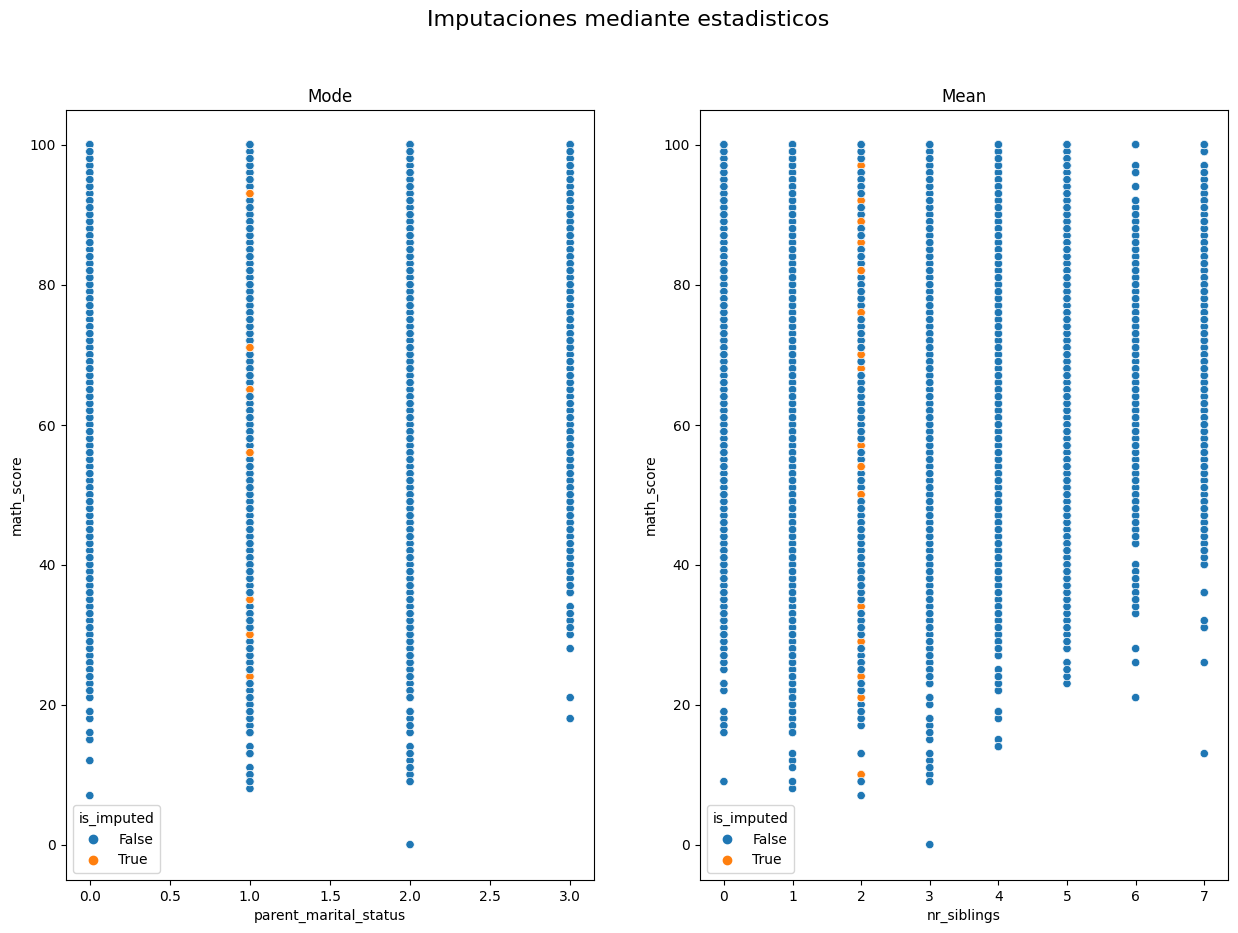

In [41]:
#Para ver a grafica un poco mas grande y definimos los axes del grafico
fig, ax = plt.subplots(1,2,figsize=(15,10))

# Título global
fig.suptitle("Imputaciones mediante estadisticos", fontsize=16)

#Visualizando una moda
(
    exam_scores_df_ordinal_encoder
    .missing.bind_shadow_matrix(True,False,suffix='_imp') # Creamos la matrix de sombras, la variables que tienen _imp son las que seran imputadas
    .assign(
        transport_means = lambda df: df.transport_means.fillna(value=df.transport_means.mode()[0]), #Llenamos los valores faltantes por la moda. Al indicar [0], seleccionamos el primer valor de la serie de modas de mode() o el valor de moda más común
        parent_educ = lambda df: df.parent_educ.fillna(value=df.parent_educ.mode()[0]),
        ethnic_group = lambda df: df.ethnic_group.fillna(value=df.ethnic_group.mode()[0]),
        test_prep = lambda df: df.test_prep.fillna(df.test_prep.mode()[0]),
        nr_siblings = lambda df: df.nr_siblings.fillna(df.nr_siblings.mean().round()) , #Llenamos el los valores faltantes por la media, se usa round porque puede que de valores tipo float
        parent_marital_status	= lambda df: df.parent_marital_status.fillna(df.parent_marital_status.mode()[0]) ,
        wkly_study_hours = lambda df: df.wkly_study_hours.fillna(df.wkly_study_hours.mode()[0]) ,
        is_first_child = lambda df: df.is_first_child.fillna(df.is_first_child.mode()[0]),
        practice_sport = lambda df: df.practice_sport.fillna(df.practice_sport.mode()[0])
    )
    #Lo que esto hara es detectar el subfijo para asi determinar si los valores ya estaban en el df o se imputaron
    .missing.scatter_imputation_plot( #Con esta funcion veremos los valores imputados
        x='parent_marital_status',  #Primer variable
        y='math_score',#Segunda variable
        ax=ax[0]#Indicar en que posición esta el grafico
    )
)

ax[0].set_title('Mode') #Título para el primer gráfico

(
    exam_scores_df_ordinal_encoder
    .missing.bind_shadow_matrix(True,False,suffix='_imp') # Creamos la matrix de sombras, la variables que tienen _imp son las que seran imputadas
    .assign(
        transport_means = lambda df: df.transport_means.fillna(value=df.transport_means.mode()[0]), #Llenamos los valores faltantes por la moda. Al indicar [0], seleccionamos el primer valor de la serie de modas de mode() o el valor de moda más común
        parent_educ = lambda df: df.parent_educ.fillna(value=df.parent_educ.mode()[0]),
        ethnic_group = lambda df: df.ethnic_group.fillna(value=df.ethnic_group.mode()[0]),
        test_prep = lambda df: df.test_prep.fillna(df.test_prep.mode()[0]),
        nr_siblings = lambda df: df.nr_siblings.fillna(df.nr_siblings.mean().round()) , #Llenamos el los valores faltantes por la media, se usa round porque puede que de valores tipo float
        parent_marital_status	= lambda df: df.parent_marital_status.fillna(df.parent_marital_status.mode()[0]) ,
        wkly_study_hours = lambda df: df.wkly_study_hours.fillna(df.wkly_study_hours.mode()[0]) ,
        is_first_child = lambda df: df.is_first_child.fillna(df.is_first_child.mode()[0]),
        practice_sport = lambda df: df.practice_sport.fillna(df.practice_sport.mode()[0])
    )
    #Lo que esto hara es detectar el subfijo para asi determinar si los valores ya estaban en el df o se imputaron
    .missing.scatter_imputation_plot( #Con esta funcion veremos los valores imputados
        x='nr_siblings',  #Primer variable
        y='math_score',#Segunda variable
        ax=ax[1]#Indicar en que posición esta el grafico
    )
)

ax[1].set_title('Mean'); #Título para el segundo gráfico


* La imputación parece ser buena, ya que no rompe la estructura de los datos ni
la relacion entre variables, los puntos imputados no se estan saliendo de los puntos reales por lo que es una buena imputacion.

* Al realizar las imputaciones por un unico valor, como en este caso que se realiza por medio de la moda y media, todos los valores imputados seran lo mismos, ofreciendo poca varibiliadad en estos, por ende, podemos tomar otras alternativas si se puede llegar a considerar un problema.

###Imputación por algoritmo de vecinos mas cercanos (KNN)

* Este es uno de los algoritmos mas usados al momento de imputar información, el cual es conocido como el algoritmo de imputación K-Vecinos Mas Cercanos.

* Encuentra otras K observaciones (donantes, vecinos) que sean mas similares a esa observacion faltante con respecto a las otras variables que no le falta.

* Reemplaza los valores faltantes con los valores agregados de los k vecinos. Si los vecinos mas cercanos tienen valores de 1 y 2, entonces el valor a imputar es el promedio de ambos que es 1.5.

In [42]:
#Para reaizar esta imputación, DEBEMOS SI O SI TENER ALGUNA CODIFCACIÓN DE DATOS
#Como ya tenemos la codificación ordinal, haremos una copia de esta
exam_scores_df_knn = exam_scores_df_ordinal_encoder.copy(deep=True)
exam_scores_df_knn

,transport_means,parent_educ,ethnic_group,test_prep,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,nr_siblings,math_score,reading_score,writing_score
0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,71.0,71.0,74.0
1,NaN,4.0,2.0,NaN,1.0,0.0,1.0,2.0,0.0,1.0,0.0,69.0,90.0,88.0
2,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,4.0,87.0,93.0,91.0
3,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,45.0,56.0,42.0
4,1.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,59.0,61.0,65.0
30637,0.0,2.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,58.0,53.0,51.0
30638,0.0,2.0,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,61.0,70.0,67.0
30639,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,82.0,90.0,93.0


In [43]:
#Skelearn provee este algoritmo e imputador
knn_imputer = sklearn.impute.KNNImputer()

#Ajustamos, transformamos en un mismo paso y redondeamos los resultados para que sean enteros
#Con iloc[:,:] agregamos toda la matriz
exam_scores_df_knn.iloc[:,:] = knn_imputer.fit_transform(exam_scores_df_ordinal_encoder).round()

#Visualizamos como quedo
exam_scores_df_knn

,transport_means,parent_educ,ethnic_group,test_prep,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,nr_siblings,math_score,reading_score,writing_score
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,71.0,71.0,74.0
1,1.0,4.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,69.0,90.0,88.0
2,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,4.0,87.0,93.0,91.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,45.0,56.0,42.0
4,1.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,59.0,61.0,65.0
30637,0.0,2.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,58.0,53.0,51.0
30638,0.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,61.0,70.0,67.0
30639,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,82.0,90.0,93.0


###Visualizamos la imputación

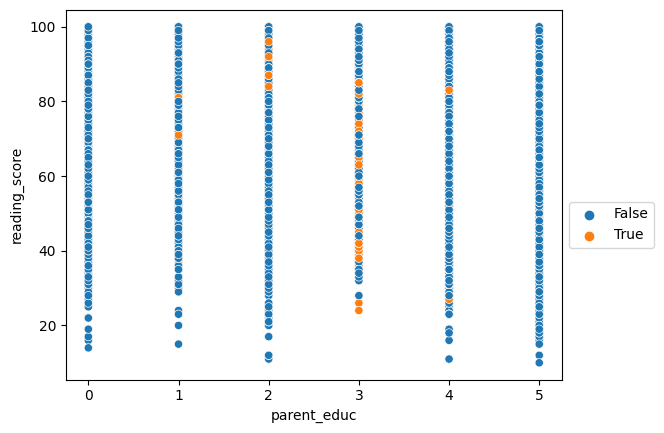

In [44]:
#Concactenaremos el df imputado con el original pero con una matriz de sombras, esto para poder hacer el grafdco
(
    pd.concat(
        [
            exam_scores_df_knn,
            exam_scores_df.missing.create_shadow_matrix(True,False,suffix='_imp') #Creamos una matriz de sombras para indicar donde habian valores faltantes
        ],
        axis=1 #Para concactenar por columnas

    )
    .missing.scatter_imputation_plot(x='parent_educ',y='reading_score') #Para ver la imputacion de los valores
)

# Mover la leyenda a la esquina superior derecha y
#con b_box se define las coordenadas de anclaje del cuadro de la leyenda en el gráfico.
plt.legend(loc='upper right',bbox_to_anchor=(1.20,0.5));

* Podemos ver que los valores imputados que son los naranjas estan dentro de los puntos azules que son los originales y esto es muy bueno, ya que se preserva la estructura de los datos.

* Ademas, estos puntos tienen variabilidad siendo bueno porque no es el mismo valor siempre, agregando algo de dispersión sin romper la estructura.

### Ordenamiento por cantidad de variables faltante

* Ordenar nuestro df, **es fundamental**, porque nos permitira tener cierto rigor al imputar valores faltantes, ya que estos valores coincidiran con ciertas caracteristicas de las filas.

* En los KNN, tambien aplica esto, solo que se puede ordenar por la cantidad de valores faltantes, de tal forma de que se pueda comenzar definiendo las distancias con valores que sabemos que existen para predecir o imputar valores que no existen, dado que se tienen multiples variables con valores faltantes.

In [45]:
#Ordenaremos por cantidad de variables faltantes que nos ayudara a producir un mejor rendimiento al imputar

#Sklearn provee este algoritmo e imputador
knn_imputer = sklearn.impute.KNNImputer()

#Realizamos una copia de ese para evitar errores y
#Mediante sort_variables_by_missigness() lo que hacemos es ordenar por cantidad de valores faltantes y con ascending=True dejamos primero las variables sin valores faltantes y al final dejamos las variables que tienen valores faltantes de forma incremental
exam_scores_df_knn_2 = exam_scores_df_ordinal_encoder.missing.sort_variables_by_missingness(ascending=True).copy(deep=True)


#Ajustamos, transformamos en un mismo paso y redondeamos los resultados para que sean enteros
#Con iloc[:,:] agregamos toda la matriz
#Tambien se debe ordenar el df original para que tome la misma estructura del df a imputar
exam_scores_df_knn_2.iloc[:,:] = knn_imputer.fit_transform(exam_scores_df_ordinal_encoder.missing.sort_variables_by_missingness(ascending=True)).round()

#Visualizamos como quedo el df
exam_scores_df_knn_2

,gender,lunch_type,math_score,reading_score,writing_score,practice_sport,is_first_child,wkly_study_hours,parent_marital_status,nr_siblings,test_prep,ethnic_group,parent_educ,transport_means
0,0.0,1.0,71.0,71.0,74.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0
1,0.0,1.0,69.0,90.0,88.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,4.0,1.0
2,0.0,1.0,87.0,93.0,91.0,2.0,1.0,1.0,2.0,4.0,1.0,1.0,3.0,1.0
3,1.0,0.0,45.0,56.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,76.0,78.0,75.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0.0,1.0,59.0,61.0,65.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,1.0
30637,1.0,1.0,58.0,53.0,51.0,1.0,0.0,0.0,2.0,1.0,1.0,4.0,2.0,0.0
30638,0.0,0.0,61.0,70.0,67.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0
30639,0.0,1.0,82.0,90.0,93.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,1.0


###Visualización de la imputación ordenada

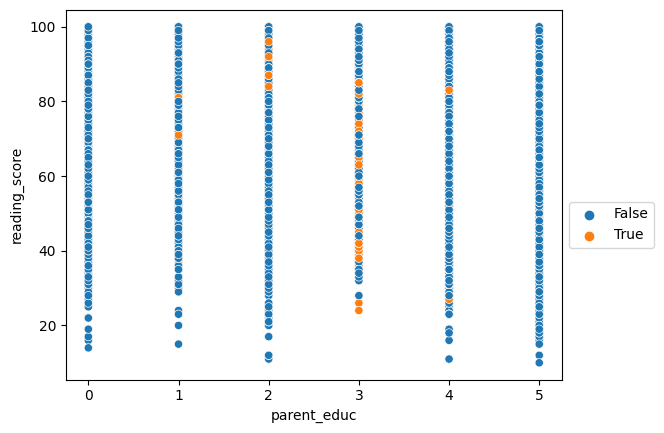

In [46]:
#Concactenaremos el df imputado con el original pero con una matriz de sombras, esto para poder hacer el grafdco
(
    pd.concat(
        [
            exam_scores_df_knn_2,
            exam_scores_df.missing.create_shadow_matrix(True,False,suffix='_imp') #Creamos una matriz de sombras para indicar donde habian valores faltantes
        ],
        axis=1 #Para concactenar por columnas

    )
    .missing.scatter_imputation_plot(x='parent_educ',y='reading_score') #Para ver la imputacion de los valores
)

# Mover la leyenda a la esquina superior derecha y
#con b_box se define las coordenadas de anclaje del cuadro de la leyenda en el gráfico.
plt.legend(loc='upper right',bbox_to_anchor=(1.20,0.5));

Aunque ambas imputaciones son similares, puede darse el caso que realizando este proceso te ayude a conseguir mejores rendimientos en el conjunto de datos.

###Transformación inversa de los datos

* Una vez hecha la imputación, se recomienda que las variables categoricas que estan representadas por numero vuelvan a su estado natural, es decir, que sean de texto de nuevo, para dar una mejor interpretación.

* Usare en este caso la imputación por KNN, ya que presento mayor variabilidad en los datos.


In [47]:
#Haremos una copia para evitar inconvenientes, en ese caso escogemos el df imputado para copiar
exam_scores_df_final = exam_scores_df_knn.copy(deep=True)
exam_scores_df_final

,transport_means,parent_educ,ethnic_group,test_prep,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,nr_siblings,math_score,reading_score,writing_score
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,71.0,71.0,74.0
1,1.0,4.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,69.0,90.0,88.0
2,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,4.0,87.0,93.0,91.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,45.0,56.0,42.0
4,1.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,1.0,2.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,59.0,61.0,65.0
30637,0.0,2.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,58.0,53.0,51.0
30638,0.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,61.0,70.0,67.0
30639,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,82.0,90.0,93.0


In [48]:
#Guardamos la información de las columnas categoricas indicandolo en el df
exam_scores_df_final[object_columns] = (
    categorical_transformer # funcion que transforma los valores de texto a numeros
    .named_transformers_ #nombre de las transformaciones realizadas a los datos
    .ordinalencoder #Accedemos al codificador
    .inverse_transform( #accedemos a la funcion inversa para aplicar sobre los datos ordinalencoder
      X=exam_scores_df_knn[object_columns] #Sera el df con las columnas categoricas que tenemos en categorical_columns
    )
)

#Visualizamos como quedo
exam_scores_df_final

,transport_means,parent_educ,ethnic_group,test_prep,parent_marital_status,wkly_study_hours,is_first_child,practice_sport,gender,lunch_type,nr_siblings,math_score,reading_score,writing_score
0,school_bus,bachelor's degree,group C,none,married,< 5,yes,regularly,female,standard,3.0,71.0,71.0,74.0
1,school_bus,some college,group C,completed,married,5 - 10,yes,sometimes,female,standard,0.0,69.0,90.0,88.0
2,school_bus,master's degree,group B,none,single,< 5,yes,sometimes,female,standard,4.0,87.0,93.0,91.0
3,private,associate's degree,group A,none,married,5 - 10,no,never,male,free/reduced,1.0,45.0,56.0,42.0
4,school_bus,some college,group C,none,married,5 - 10,yes,sometimes,male,standard,0.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,school_bus,high school,group D,none,single,5 - 10,no,sometimes,female,standard,2.0,59.0,61.0,65.0
30637,private,high school,group E,none,single,5 - 10,no,regularly,male,standard,1.0,58.0,53.0,51.0
30638,private,high school,group C,completed,married,5 - 10,no,sometimes,female,free/reduced,1.0,61.0,70.0,67.0
30639,school_bus,associate's degree,group D,completed,married,5 - 10,no,regularly,female,standard,3.0,82.0,90.0,93.0


In [55]:
#Cambiamos la vaiable nr_siblings a entero ya que esta es float
exam_scores_df = exam_scores_df_final.astype(
    {'nr_siblings' : int}
)

exam_scores_df.dtypes

transport_means           object
parent_educ               object
ethnic_group              object
test_prep                 object
parent_marital_status     object
wkly_study_hours          object
is_first_child            object
practice_sport            object
gender                    object
lunch_type                object
nr_siblings                int64
math_score               float64
reading_score            float64
writing_score            float64
dtype: object

In [56]:
#Comprobamos si hay valores faltantes
exam_scores_df_final.isna().sum()

transport_means          0
parent_educ              0
ethnic_group             0
test_prep                0
parent_marital_status    0
wkly_study_hours         0
is_first_child           0
practice_sport           0
gender                   0
lunch_type               0
nr_siblings              0
math_score               0
reading_score            0
writing_score            0
dtype: int64

#Con esto damos finalizada la imputación de valores, el dataset esta listo.